In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [3]:
e = eval.evaluation(df_path= '831_aggregated_median.csv')
con = e.norm_agg()
res_enr = e.eval(con, operation = 'enrichment')
res_enr

1280 features were identified


,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.410100,13.376603,0.0
1,0.990,0.323815,9.468006,0.0
2,0.985,0.268636,7.633792,0.0
3,0.980,0.230917,6.265665,0.0
4,0.975,0.202593,5.506049,0.0
5,0.970,0.180750,4.983295,0.0
6,0.965,0.162640,4.499396,0.0
7,0.960,0.148169,4.202030,0.0


In [4]:
res_pre = e.eval(con, operation = 'precision_recall')
res_pre

,k,precision,recall
0,5.0,0.147368,0.003556
1,10.0,0.142105,0.006414
2,15.0,0.126316,0.008828
3,20.0,0.126316,0.011609
4,25.0,0.122105,0.013808
5,30.0,0.115789,0.016177
6,40.0,0.107895,0.019776
7,50.0,0.096842,0.021393


In [4]:
hit_ls = e.eval(con, operation = 'hit@k')

running hit@k


In [ ]:
hit_ls

In [ ]:
%matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='trained 817')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()


In [6]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


In [6]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

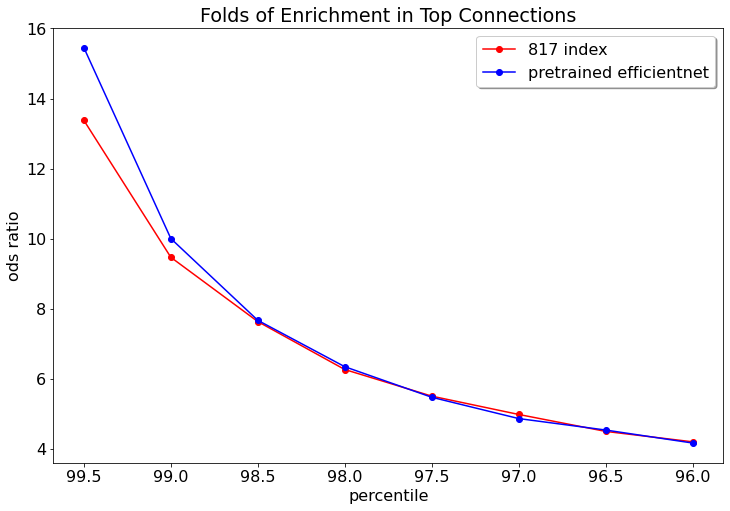

In [7]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="red", label = '817 index')
#plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="orange", label = '812 index')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()